In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data 

Please, download the data to your working folder.On the webpage you can find its description. 

https://archive.ics.uci.edu/ml/datasets/Iris


In [2]:
df = pd.read_csv('iris.data', header = None, names = ["sepal length", "sepal width", "petal length", "petal width", "class"])

## Explore the data

### You are free to use all descriptive and visualization methods we have discussed so far. Dig deeper and see what you can find :)

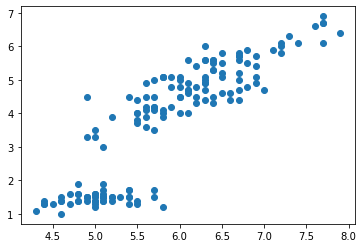

In [3]:
plt.scatter(df['sepal length'], df['petal length'])
plt.show()

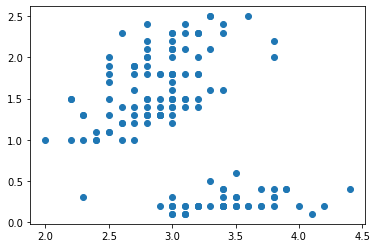

In [5]:
plt.scatter(df['sepal width'], df['petal width'])
plt.show()

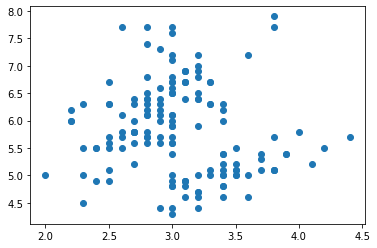

In [6]:
plt.scatter(df['sepal width'], df['sepal length'])
plt.show()

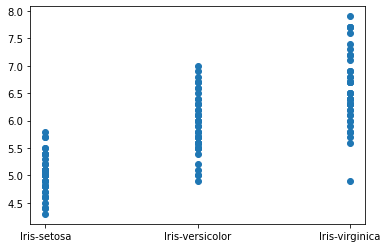

In [7]:
plt.scatter(df['class'], df['sepal length'])
plt.show()

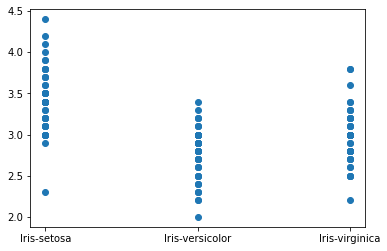

In [8]:
plt.scatter(df['class'], df['sepal width'])
plt.show()

## Clustering

### Implement the K-means algorithm

In [9]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = random.choice(data)

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    # print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


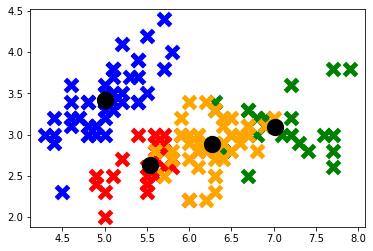

In [13]:
colors = ['red', 'green', 'blue', 'orange', 'purple']
x = df[["sepal length", "sepal width", "petal length", "petal width"]]. to_numpy() 
    
def plot_results(k, plt = plt):
    model = K_Means(k=k)
    model.fit(x)

    for classification in model.classifications:
        color = colors[classification]
        for featureset in model.classifications[classification]:
            plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

    for centroid in model.centroids:
        plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                    marker="o", color="k", s=150, linewidths=5)

plot_results(4)

### Choose the best-K, using the elbow method 

In [14]:
def calculate_WSS(x, max_k):
    sse = []
    for k in range(1, max_k + 1):
        model = K_Means(k = k)
        model.fit(x)
        
        curr_sse = 0
        for i in range(k):
            errors = [np.linalg.norm(classification-model.centroids[i]) for classification in model.classifications[i]]
            curr_sse += np.sum(errors)

        sse.append(curr_sse)
    return sse

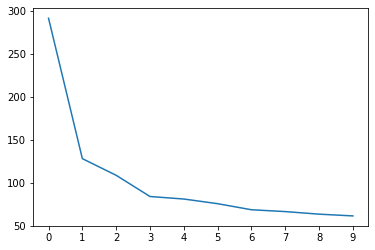

In [18]:
max_k = 10
plt.plot(range(max_k), calculate_WSS(x, max_k))
plt.xticks(range(max_k))
plt.show()

I choose K = 3 using the Elbow method.

### See whether the clustering algorithm really captures the underlying data distribution by assigning labels to each cluster and comaring with ground truth

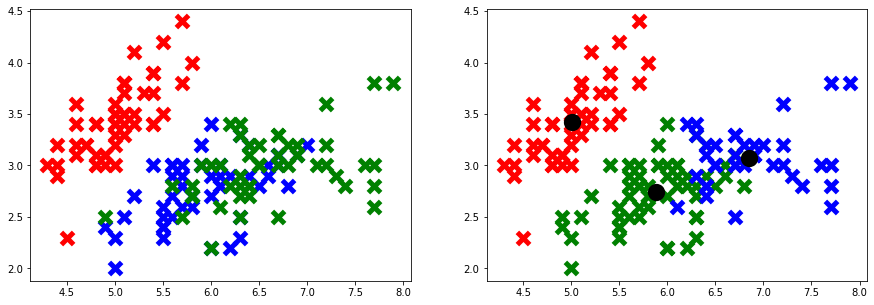

In [44]:
model = K_Means(3)
model.fit(x)

color_dict = {
    'Iris-setosa': colors[0],
    'Iris-virginica': colors[1],
    'Iris-versicolor': colors[2]
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for index, row in df.iterrows():
    ax1.scatter(row.values[0], row.values[1], marker="x", color=color_dict[row['class']], s=150, linewidths=5)

plot_results(3, ax2)

The results are mostly the same.